## 차원축소 & PCA

<br>

- 우리가 다루는 데이터는 여러개의 차원으로 이뤄져있음.
- 데이터의 column이 차원 인 셈.
- 고차원을 저차원으로 축소시켜 데이터를 표현하면 설명과 해석이 용이.
    - 왜 차원축소? 고차원에서 일어나는 차원의 저주 문제를 피하기 위해서. 고차원은 최적화가 힘듬.
- 대표적으로 PCA 알고리즘을 많이 사용함.
- PCA? **원본 데이터의 정보를 최대한 살리면서 차원이 축소된 새로운 축을 다시 설계**하는 것.
    - 즉, 차원이 축소된 **새로운 좌표체계를 만들어서 데이터를 표현**하는 것.
    - 새로운 축w를 기존의 변동을 가장 많이 반영하는 방향으로 잡음. 추상적인 축.

### PCA?

<br>

$$X^T X = VDV^T, X = UV^T$$

- $X$ = 원본데이터. 이를 $U$(스코어 scores 행렬), $V$(부하 loadings 행렬)로 찢는다. 고윳값 분해.
    - $V$는 $X^T X$의 고유벡터를 열 로 가지는 직교행렬. 여기서 k개를 고르면 새로운 축을 구할 수 있음.
- $D$는 대각행렬. $X^T X$의 고윳값이 내림차순으로 구성된 행렬.
    - 원본 X에 p개의 차원이 있고, 축소시키고 싶은 차원이 k라 하자. k는 p와 같거나 작을것.
    - 가장 큰 고윳값 순으로 D에서 k개의 고윳값을 선택.
    - 이 k개의 고윳값을 이용해 원래의 값을 설명할 수 있게 됨. 즉, p개의 차원이 k개의 차원으로 축소되는 셈.
- k를 축소된 차원, n을 데이터 개수, p를 원본 차원이라 한다면
    - $U$는 $n*k$행렬. 모든 데이터 n개를 k개의 차원으로 설명이 가능.
    - $V$는 $p*k$행렬. 원본 데이터의 차원을 축소된 차원 k로 설명하는 가중치 행렬.
    - 즉, $U*V=X$가 되는 셈.
- p개의 차원을 k개의 차원으로 축소하는데, 정보손실을 최소화하는 k를 골라야 한다.
    - 이 k는 우리가 고를 수 있는게 아님. 정확한 k를 고를 수 있게 도와주는 여러 방법론이 있음.
    - 파이썬에 구현된 PCA 알고리즘은 알아서 해줌.

## DBSCAN

<br>

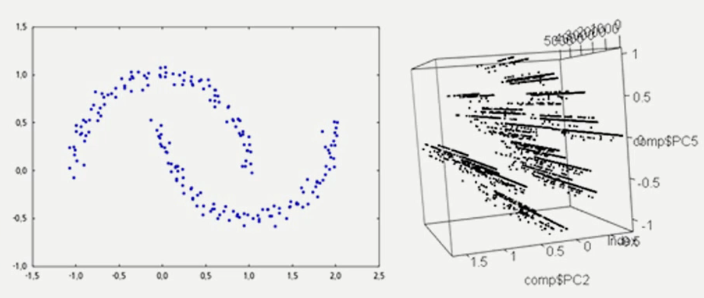

- K-means는 이런 길쭉한 형태의 데이터로는 군집을 잘 못잡음.
- DBSCAN은 밀도기반으로 노이즈까지 잡아내는 탁월한 성능을 가진 군집 알고리즘.
- 군집분석을 위해 데이터 압축, 거리함수산정이 필요.
    - 데이터 압축 방법으로 PCA를 적용해보자.
 
<br>

- 간단히 용어 몇개 집고 넘어가자.
    - **이웃벡터** : 한 데이터부터 반경 $\epsilon$의 원 안에 포함된 데이터 벡터. (점 객체)
    - **핵심벡터** : $n$개 이상의 이웃 벡터를 갖는 데이터 벡터.
    - **직접 접근 가능** : 핵심 벡터 p와 p의 이웃 벡터 q와의 관계. $p \rightarrow q$로 표시.
    - **접근 가능** : 직접 접근 가능한 관계가 연쇄적으로 $p \rightarrow p1 \rightarrow p2 \rightarrow ... \rightarrow q$처럼 있다면 q는 p로부터 접근 가능. $p \Rightarrow q$로 표시.
    - **연결가능** : 데이터 벡터 p와 q사이에 접근 가능한 데이터 벡터 r이 존재한다면($r \Rightarrow p$, $r \Rightarrow q$), p와 q는 서로 연결되어 있음. $p \Leftrightarrow q$로 표시.
    - **군집** : 한 핵심 벡터 p에 대해 접근 가능한 모든 벡터들의 집합. 군집 내 모든 벡터들은 연결가능.

**PCA + DBSCAN 예제**

In [2]:
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Data Loading
data = pd.read_csv('UseData/wholesale.csv')
print(data.shape)
data.head()

(440, 8)


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# 차원 축소
pca = PCA(n_components=2) # 2로 둔 이유? 2차원 그래프를 그릴꺼니까.
result = pca.fit_transform(data)

# 정규화
stscaler = StandardScaler().fit(result)
result = stscaler.transform(result)
result

array([[ 5.06623851e-02,  1.31615053e-01],
       [-3.45022873e-01,  3.35566736e-01],
       [-3.77382855e-01,  2.14064858e-01],
       [ 7.71870856e-02, -5.21291101e-01],
       [ 8.30678865e-01, -1.79280353e-01],
       [-2.15577605e-01, -7.96795411e-02],
       [-5.57696635e-02, -1.67100729e-01],
       [-3.48746718e-01,  1.18663547e-01],
       [-5.23137216e-01, -1.83114067e-01],
       [-3.75951548e-01,  1.11903068e+00],
       [-6.21554014e-01,  4.74092290e-01],
       [ 2.83651241e-03, -5.01210014e-01],
       [ 1.55412895e+00,  3.81125914e-01],
       [ 7.32373554e-01,  4.90855315e-01],
       [ 9.86742671e-01,  3.77030078e-01],
       [-2.33641193e-01, -5.05857196e-01],
       [-8.25341946e-01,  5.46560384e-01],
       [-4.96248078e-01, -3.05538542e-01],
       [ 5.16257493e-01,  1.04155150e-01],
       [-3.78905236e-01, -1.87265732e-02],
       [ 3.73660891e-01, -3.31113031e-01],
       [-5.64661144e-01, -6.09939662e-01],
       [ 1.50417471e+00, -5.75829519e-01],
       [ 1.

    8개의 차원을 가장 잘 설명할 수 있도록 2개의 차원으로 축소한 것.

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'Wholesale Data - PCA')

C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


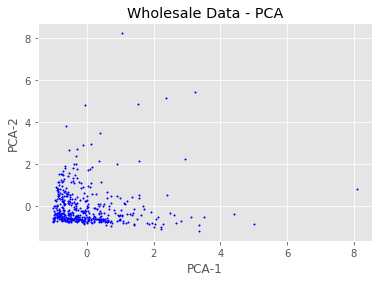

In [6]:
%pylab inline
import matplotlib.pyplot as plt

plt.style.use('ggplot')

plt.scatter(result[:, 0], result[:, 1], s=2, color='blue')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.title('Wholesale Data - PCA')

    잘 보면 좌하단에 군집이 형성되어 있음.
    그 외 포인트에 노이즈가 있는 것 또한 확인할 수 있음.

In [8]:
# 밀도기반 군집분석을 해보자.
dbsc = DBSCAN(eps = .5, min_samples = 15).fit(result) # epsilon 반경은 0.5. core data는 15
# epsilon 반경 0.5 안에 core data가 15개 있어야 군집으로 정의하겠다 하는 셈.

labels = dbsc.labels_
core_samples = np.zeros_like(labels, dtype=bool)
core_samples[dbsc.core_sample_indices_] = True
print(labels)
print(core_samples)

[ 0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0 -1
  0 -1  0  0 -1  0  0  0 -1  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0 -1  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0 -1  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0  0 -1 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0 -1 -1  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0

    이렇게 보면 -1(False)로 되어있는 것들이 노이즈 인 것을 확인할 수 있음.
    실제 그래프 그려서 봤던것처럼 1개의 군집과 나머지 노이즈들로 구성됐음.

In [9]:
# 색상테이블 만들기
# Factor가 몇개인지 봐보자. 여기는 지금 2개가 잡힐것.
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

In [10]:
len(unique_labels), unique_labels # 라벨은 -1(노이즈), 0(군집벡터) 2개.

(2, array([-1,  0], dtype=int64))

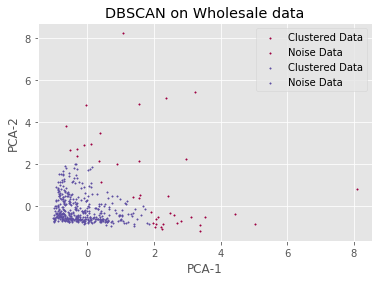

In [14]:
# 군집과 노이즈를 색깔로 구분해보자.
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = result[class_member_mask & core_samples]
    plt.scatter(xy[:,0], xy[:,1], color=color, s=2, label='Clustered Data')
    
    xy2 = result[class_member_mask & ~core_samples]
    plt.scatter(xy2[:,0], xy2[:,1], color=color, s=2, label='Noise Data')
    
plt.title('DBSCAN on Wholesale data')
plt.xlabel('PCA-1')
plt.ylabel('PCA-2')
plt.legend()
plt.show()

**PCA를 써서 Iris를 분석해보자**

In [15]:
from sklearn import datasets

iris = datasets.load_iris()
dataset = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                       columns=iris['feature_names'] + ['target'])
# 컬럼명을 바꾸자.
dataset.columns = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Class도 다시 바꾸자.
# 'setosa' 0, 'versicolor' 1, 'virginica' 2
dataset.loc[dataset['Class']==0, 'Class'] = 'Iris-setosa'
dataset.loc[dataset['Class']==1, 'Class'] = 'Iris-versicolor'
dataset.loc[dataset['Class']==2, 'Class'] = 'Iris-virginica'

dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
# 설명변수 / 목표변수 나누고 정규화
from sklearn.preprocessing import StandardScaler

features = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width']

X = dataset.loc[:, features].values
Y = dataset.loc[:, ['Class']].values

X = StandardScaler().fit_transform(X)

X.shape, X

((150, 4), array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
         -1.31544430e+00],
        [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
         -1.31544430e+00],
        [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
         -1.31544430e+00],
        [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
         -1.05217993e+00],
        [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
         -1.18381211e+00],
        [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
         -1.31544430e+00],
        [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
         -1.31544430e+00],
        [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
         -1.44707648e+00],
        [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
         -1.31544430e+00],
        [-1.26418478e+00,  7.8880

In [19]:
Y

array([['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-setosa'],
       ['Iris-se

In [20]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [22]:
principalCompoments = pca.fit_transform(X)
principalDF = pd.DataFrame(data=principalCompoments, 
                           columns=['principal component 1', 'principal component 2'])
principalDF

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


Populating the interactive namespace from numpy and matplotlib


C:\Users\skdbs\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['gulim'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


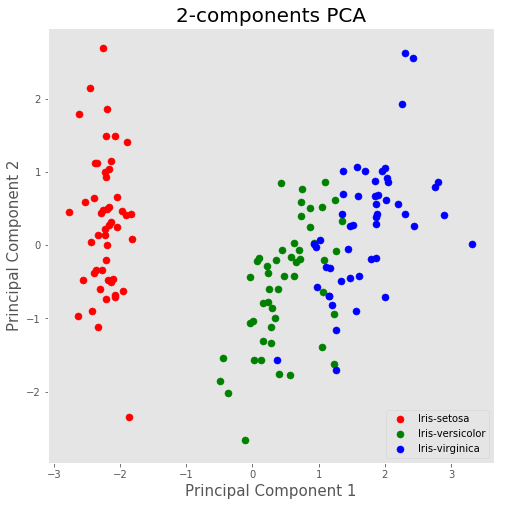

In [24]:
import matplotlib.pyplot as plt
%pylab inline

finalDF = pd.concat([principalDF, dataset[['Class']]], axis=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1,1,1)

ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2-components PCA', fontsize=20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']

for target, color in zip(targets, colors):
    indicesToKeep = finalDF['Class'] == target
    ax.scatter(finalDF.loc[indicesToKeep, 'principal component 1'],
               finalDF.loc[indicesToKeep, 'principal component 2'], c=color, s=50)

ax.legend(targets)
ax.grid()

    최적의 주성분 갯수 구하는 그래프 그리는거? 표? 는 따로 공부해서 해보자.